In [1]:
import numpy as np
np.random.seed(1337)

In [2]:
from keras.models import Sequential   #按顺序建立的Model
from keras.layers import Dense   #全连接层

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint

In [3]:
import matplotlib.pyplot as plt

In [4]:
X=np.linspace(-1,1,200)
np.random.shuffle(X)
Y=0.5*X + 2 + np.random.normal(0,0.05,(200,))

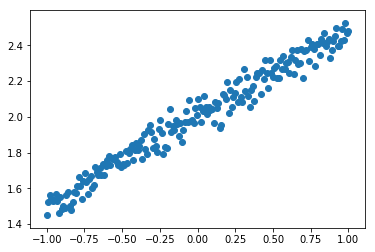

In [5]:
plt.scatter(X,Y)
plt.show()

In [6]:
X_train,Y_train = X[:160],Y[:160]
X_test,Y_test = X[160:],Y[160:]

In [7]:
#创建模型
model=Sequential()
#加层(第一层)
model.add(Dense(output_dim=1,input_dim=1))

W0819 18:46:14.026596 44908 deprecation_wrapper.py:119] From c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  after removing the cwd from sys.path.
W0819 18:46:14.107600 44908 deprecation_wrapper.py:119] From c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 18:46:14.121601 44908 deprecation_wrapper.py:119] From c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecate

In [8]:
model.compile(loss='mse',optimizer='sgd')

W0819 18:46:14.842642 44908 deprecation_wrapper.py:119] From c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
print('Training-----------')
for step in range(301):
    cost = model.train_on_batch(X_train,Y_train)
    if step%100==0:
        print('train cost',cost)    

Training-----------


W0819 18:46:15.760695 44908 deprecation_wrapper.py:119] From c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0819 18:46:15.820698 44908 deprecation_wrapper.py:119] From c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



train cost 4.0225005
train cost 0.073238626
train cost 0.00386274
train cost 0.002643449


In [10]:
print('/nTesting------------')
cost=model.evaluate(X_test,Y_test,batch_size=40)
print('test cost',cost)
W,b=model.layers[0].get_weights()
print('Weight=',W,'\nbiases',b)

/nTesting------------
40/40 [==============================] - 0s 1ms/step
test cost 0.0031367032788693905
Weight= [[0.4922711]] 
biases [1.9995022]


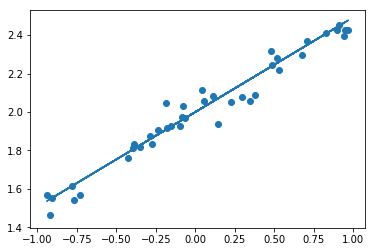

In [11]:
Y_pred=model.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred)
plt.show()